In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

from ema_workbench import (Model, RealParameter, TimeSeriesOutcome,
                           perform_experiments, ema_logging,Policy, MultiprocessingEvaluator)

from ema_workbench import Samplers

from dike_model_function import DikeNetwork  # @UnresolvedImport

from problem_formulation import get_model_for_problem_formulation

from ema_workbench.em_framework.salib_samplers import get_SALib_problem

from SALib.analyze import sobol

import pickle

In [3]:
ema_logging.log_to_stderr(ema_logging.INFO);

In [4]:
dike_model, planning_steps = get_model_for_problem_formulation(2)

In [5]:
planning_steps

array([0, 1, 2])

In [6]:
uncertainties = dike_model.uncertainties
outcomes = dike_model.outcomes
levers = dike_model.levers

problem = get_SALib_problem(uncertainties)
print(problem)

{'num_vars': 19, 'names': ['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail', 'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate', 'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax', 'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1', 'discount rate 2'], 'bounds': [(0, 133), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (0, 4), (0, 4), (0, 4)]}


In [7]:
#for unc in dike_model.uncertainties:
#    print(repr(unc))

In [8]:
#for out in dike_model.outcomes:
#    print(repr(out))

In [9]:
for lev in dike_model.levers:
    print(repr(lev.name))

'0_RfR 0'
'0_RfR 1'
'0_RfR 2'
'1_RfR 0'
'1_RfR 1'
'1_RfR 2'
'2_RfR 0'
'2_RfR 1'
'2_RfR 2'
'3_RfR 0'
'3_RfR 1'
'3_RfR 2'
'4_RfR 0'
'4_RfR 1'
'4_RfR 2'
'EWS_DaysToThreat'
'A.1_DikeIncrease 0'
'A.1_DikeIncrease 1'
'A.1_DikeIncrease 2'
'A.2_DikeIncrease 0'
'A.2_DikeIncrease 1'
'A.2_DikeIncrease 2'
'A.3_DikeIncrease 0'
'A.3_DikeIncrease 1'
'A.3_DikeIncrease 2'
'A.4_DikeIncrease 0'
'A.4_DikeIncrease 1'
'A.4_DikeIncrease 2'
'A.5_DikeIncrease 0'
'A.5_DikeIncrease 1'
'A.5_DikeIncrease 2'


In [10]:
def get_0_dict():
    return {l.name: 0 for l in dike_model.levers}

# Creates a Policy object from a dict and a (optional) name
def create_policy(dict1, name=None):
    return Policy(f"Policy_{name}", **dict(get_0_dict(), **dict1))

In [11]:
pol = create_policy({'0_RfR 0': 0,
 '1_RfR 0': 0,
 '2_RfR 0': 0,
 '3_RfR 0': 0,
 '4_RfR 0': 0,
 'EWS_DaysToThreat': 0,
 'A.1_DikeIncrease 0': 0,
 'A.2_DikeIncrease 0': 0,
 'A.3_DikeIncrease 0': 0,
 'A.4_DikeIncrease 0': 0,
 'A.5_DikeIncrease 0': 0,},'Upstream dike, downstream rfr')

In [12]:
pol

Policy({'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 'EWS_DaysToThreat': 0, 'A.1_DikeIncrease 0': 0, 'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 'A.2_DikeIncrease 0': 0, 'A.2_DikeIncrease 1': 0, 'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': 0, 'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 0, 'A.4_DikeIncrease 0': 0, 'A.4_DikeIncrease 1': 0, 'A.4_DikeIncrease 2': 0, 'A.5_DikeIncrease 0': 0, 'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0})

In [13]:
policies = pol
n_exp = 500 #1000 if 

with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=n_exp, policies = pol, uncertainty_sampling=Samplers.SOBOL)
        
experiments_sobol, outcomes_sobol = results

[MainProcess/INFO] pool started with 4 workers
/Users/marcpeterstreng/opt/miniconda3/envs/py39/lib/python3.9/site-packages/SALib/sample/saltelli.py:94: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (500) is equal to `2^n`.
        
  warnings.warn(msg)
[MainProcess/INFO] performing 20000 scenarios * 1 policies * 1 model(s) = 20000 experiments
  0%|                                     | 1/20000 [00:02<15:54:09,  2.86s/it]Traceback (most recent call last):
  File "/Users/marcpeterstreng/opt/miniconda3/envs/py39/lib/python3.9/site-packages/ema_workbench/em_framework/callbacks.py", line 246, in _store_outcomes
    self.results[outcome][case_id,] = outcome_res
KeyError: 'Dike Investment Costs'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/marcpeterstreng/opt/miniconda3/envs/py39/lib/python3.9/site-packages/ema_workbench/em_framework/ema_multiprocessing.py", line 253, 

In [14]:
outcomes_sobol['Expected Number of Deaths'] = np.nan_to_num(outcomes_sobol['Expected Number of Deaths'], nan = 3.01437703)

In [41]:
deaths_sobol = sobol.analyze(problem, outcomes_sobol['Expected Number of Deaths'],calc_second_order=True, print_to_console=True)
damages_sobol = sobol.analyze(problem, outcomes_sobol['Expected Annual Damage'],calc_second_order=True, print_to_console=True)

                               ST   ST_conf
A.0_ID flood wave shape  0.013868  0.011030
A.1_Bmax                 0.031482  0.015077
A.1_Brate                0.005820  0.010653
A.1_pfail                0.286254  0.044262
A.2_Bmax                 0.006478  0.010629
A.2_Brate                0.005420  0.010650
A.2_pfail                0.028745  0.013736
A.3_Bmax                 0.005440  0.010657
A.3_Brate                0.005412  0.010652
A.3_pfail                0.773028  0.087776
A.4_Bmax                 0.005422  0.010648
A.4_Brate                0.005413  0.010652
A.4_pfail                0.006591  0.010902
A.5_Bmax                 0.005412  0.010652
A.5_Brate                0.005412  0.010652
A.5_pfail                0.019297  0.011498
discount rate 0          0.005412  0.010652
discount rate 1          0.005412  0.010652
discount rate 2          0.005412  0.010652
                               S1   S1_conf
A.0_ID flood wave shape  0.003343  0.014330
A.1_Bmax                 0.00503

In [57]:
Si_filter = {k:deaths_sobol[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df_deaths = pd.DataFrame(Si_filter, index=problem['names'])
Si_df_deaths['ST-S1'] = Si_df_deaths['ST'] - Si_df_deaths['S1']
Si_df_deaths

ST   ST_conf        S1   S1_conf     ST-S1
A.0_ID flood wave shape  0.013868  0.011030  0.003343  0.014330  0.010525
A.1_Bmax                 0.031482  0.015077  0.005034  0.020350  0.026448
A.1_Brate                0.005820  0.010653  0.003200  0.009660  0.002620
A.1_pfail                0.286254  0.044262  0.169728  0.068125  0.116527
A.2_Bmax                 0.006478  0.010629  0.006092  0.010340  0.000385
A.2_Brate                0.005420  0.010650  0.004637  0.009380  0.000783
A.2_pfail                0.028745  0.013736  0.006680  0.020533  0.022065
A.3_Bmax                 0.005440  0.010657  0.004448  0.009239  0.000992
A.3_Brate                0.005412  0.010652  0.004731  0.009338  0.000682
A.3_pfail                0.773028  0.087776  0.656297  0.105095  0.116730
A.4_Bmax                 0.005422  0.010648  0.004358  0.009462  0.001064
A.4_Brate                0.005413  0.010652  0.004646  0.009331  0.000767
A.4_pfail                0.006591  0.010902  0.002237  0.009543  0.004355
A.5_Bmax                 0.005412  0.010652  0.004736  0.009321  0.000676
A.5_Brate                0.005412  0.010652  0.004736  0.009321  0.000676
A.5_pfail                0.019297  0.011498  0.013153  0.015303  0.006145
discount rate 0          0.005412  0.010652  0.004736  0.009321  0.000676
discount rate 1          0.005412  0.010652  0.004736  0.009321  0.000676
discount rate 2          0.005412  0.010652  0.004736  0.009321  0.000676

In [ ]:
# A.1_pfail and A.3_pfail seem to have higher order interactions

In [55]:
## However, the S2 dataframe shows these interactions are not very strong
#S2_deaths_sobol= pd.DataFrame(deaths_sobol['S2'])
#S2_deaths_sobol

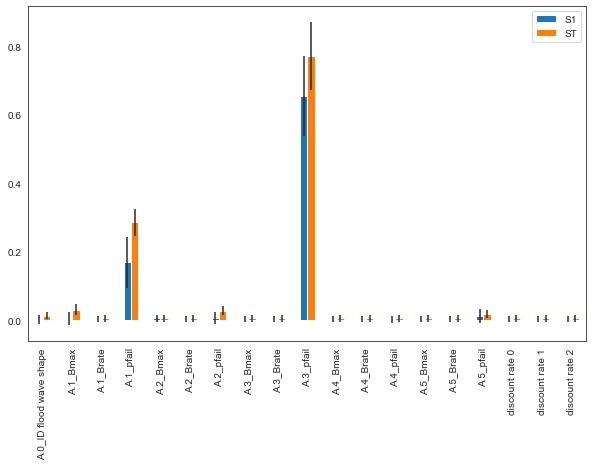

In [17]:
sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(10,8)
fig.subplots_adjust(bottom=0.3)
plt.show()

In [45]:
Si_filter = {k:damages_sobol[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df_damages = pd.DataFrame(Si_filter, index=problem['names'])
Si_df_damages['ST-S1'] = Si_df_damages['ST'] - Si_df_damages['S1']
Si_df_damages

ST   ST_conf        S1   S1_conf     ST-S1
A.0_ID flood wave shape  0.004858  0.001355 -0.003440  0.009526  0.008298
A.1_Bmax                 0.009786  0.005113  0.003198  0.011818  0.006589
A.1_Brate                0.000151  0.000190 -0.001028  0.001366  0.001179
A.1_pfail                0.717187  0.085998  0.662021  0.085315  0.055166
A.2_Bmax                 0.000418  0.000360  0.000864  0.002317 -0.000445
A.2_Brate                0.000009  0.000007 -0.000034  0.000268  0.000043
A.2_pfail                0.023173  0.005744  0.017003  0.016155  0.006170
A.3_Bmax                 0.000039  0.000022 -0.000192  0.000717  0.000231
A.3_Brate                0.000001  0.000001  0.000004  0.000166 -0.000003
A.3_pfail                0.230701  0.038294  0.191060  0.053554  0.039641
A.4_Bmax                 0.000013  0.000020 -0.000117  0.000220  0.000131
A.4_Brate                0.000003  0.000004 -0.000100  0.000218  0.000103
A.4_pfail                0.001358  0.000676  0.000306  0.004471  0.001052
A.5_Bmax                 0.000000  0.000000  0.000000  0.000000  0.000000
A.5_Brate                0.000000  0.000000  0.000000  0.000000  0.000000
A.5_pfail                0.018199  0.006596  0.015145  0.016633  0.003054
discount rate 0          0.021552  0.003996  0.009690  0.017870  0.011863
discount rate 1          0.021504  0.003734  0.018780  0.015793  0.002725
discount rate 2          0.020439  0.003164  0.015432  0.016915  0.005006

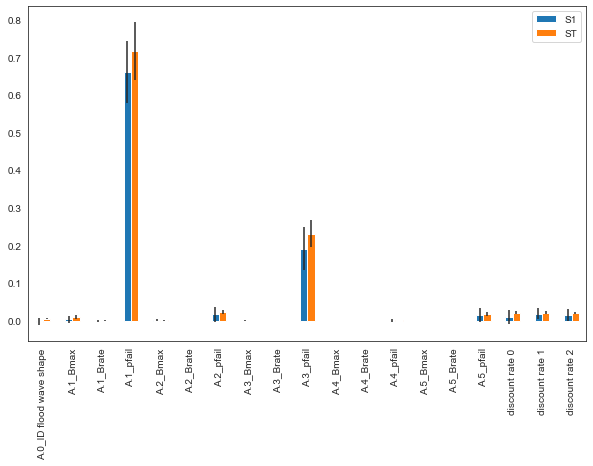

In [19]:
sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(10,8)
fig.subplots_adjust(bottom=0.3)
plt.show()

In [49]:
S2_deaths_sobol= pd.DataFrame(deaths_sobol['S2'])